#### Importation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils.layers import layers_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [3]:
# Microplastics

qnt_mps = 1000
tamanho_limite_mp = 100

# Filter
tamanho_rede = 1000
porosidade = 0.5
camadas = 6
limite_tamanho_poro = 100

# CBM
concentracao_cbm = 1
tamanho_cbm = 4

#### Simulation

In [8]:
filtro = layers_creation(tamanho_rede=1000,porosidade=0.3,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.9,tamanho_cbm=4,display=False)

mps_dic = mps_creation(qnt_mps = 1000,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,display=False)

In [11]:
print(f'Qtd total MPs {qnt_mps}, qtd MPs retidos {mps_retidos}')
print(f'Eficiência: {100*(round(mps_retidos/qnt_mps,2))}%')

Qtd total MPs 1000, qtd MPs retidos 974
Eficiência: 97.0%


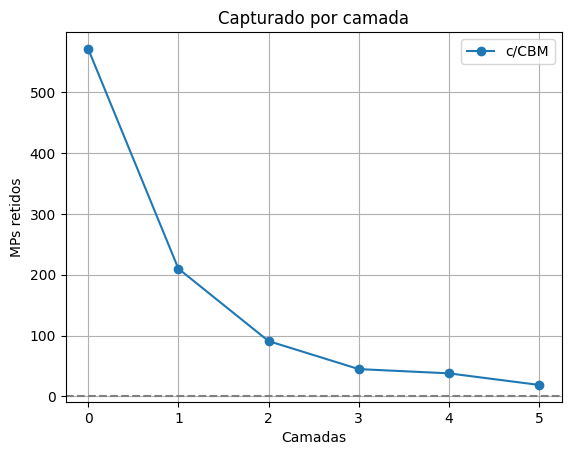

In [10]:
plt.plot(range(camadas),retencao_camada,'-o',label='c/CBM')

plt.title('Capturado por camada')
plt.xlabel('Camadas')
plt.ylabel('MPs retidos')

plt.axhline(y=0,color='gray',linestyle='--')

plt.legend()
plt.grid()
plt.show()

#### CBM

In [4]:
filtro_c_cbm = layers_creation(tamanho_rede=1000,porosidade=0.3,
                         camadas=6,limite_tamanho_poro=100,CBM=True,
                         concentracao_cbm=0.9,tamanho_cbm=4,display=False)

mps_dic_c_cbm = mps_creation(qnt_mps = 1000,
                       tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_c_cbm,retencao_camada_c_cbm = filtration_sim(filtro_c_cbm,mps_dic_c_cbm,display=False)

In [5]:
filtro_s_cbm = layers_creation(tamanho_rede=1000,porosidade=0.3,
                               camadas=6,limite_tamanho_poro=100,CBM=False,
                               concentracao_cbm=0.9,tamanho_cbm=4,display=False)

mps_dic_s_cbm = mps_creation(qnt_mps = 1000,
                             tamanho_limite_mp = 100,tamanho_rede=1000)

mps_retidos_s_cbm,retencao_camada_s_cbm = filtration_sim(filtro_s_cbm,mps_dic_s_cbm,display=False)

In [6]:
print('Com CBM')
print(f'Qtd total MPs {qnt_mps}, qtd MPs retidos {mps_retidos_c_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_c_cbm/qnt_mps,2))}%')

print('Sem CBM')
print(f'Qtd total MPs {qnt_mps}, qtd MPs retidos {mps_retidos_s_cbm}')
print(f'Eficiência: {100*(round(mps_retidos_s_cbm/qnt_mps,2))}%')

Com CBM
Qtd total MPs 1000, qtd MPs retidos 969
Eficiência: 97.0%
Sem CBM
Qtd total MPs 1000, qtd MPs retidos 952
Eficiência: 95.0%


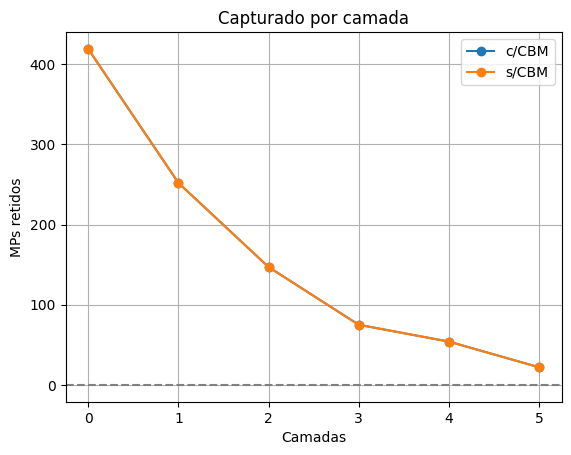

In [7]:
plt.plot(range(camadas),retencao_camada_c_cbm,'-o',label='c/CBM')
plt.plot(range(camadas),retencao_camada_c_cbm,'-o',label='s/CBM')

plt.title('Capturados por camada')
plt.xlabel('Camadas')
plt.ylabel('MPs retidos')

plt.axhline(y=0,color='gray',linestyle='--')

plt.legend()
plt.grid()
plt.show()

#### Porosidade

Qtd total MPs 1000, qtd MPs retidos 1000
Eficiência: 100.0%
Qtd total MPs 1000, qtd MPs retidos 958
Eficiência: 96.0%
Qtd total MPs 1000, qtd MPs retidos 833
Eficiência: 83.0%
Qtd total MPs 1000, qtd MPs retidos 644
Eficiência: 64.0%
Qtd total MPs 1000, qtd MPs retidos 395
Eficiência: 40.0%


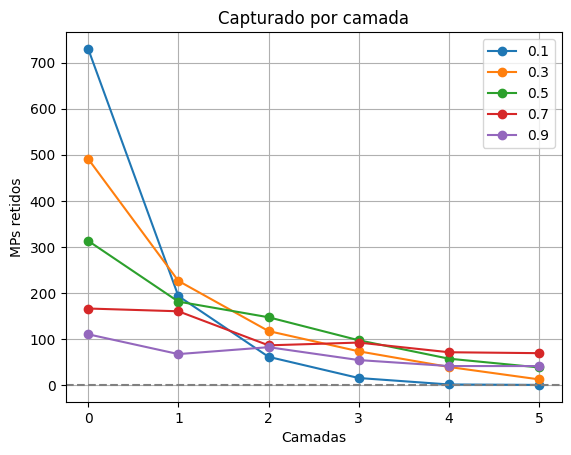

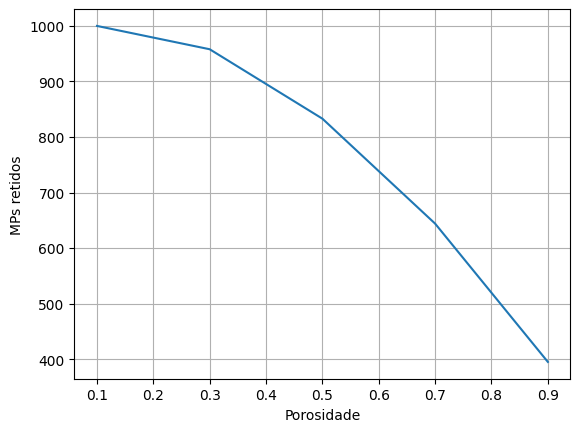

In [17]:
retencao_porosidade = []
porosidades = [0.1,0.3,0.5,0.7,0.9]

for por in porosidades:

    filtro = layers_creation(tamanho_rede=1000,porosidade=por,
                            camadas=6,limite_tamanho_poro=100,CBM=True,
                            concentracao_cbm=0.9,tamanho_cbm=4,display=False)

    mps_dic = mps_creation(qnt_mps = 1000,
                        tamanho_limite_mp = 100,tamanho_rede=1000)

    mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,display=False)

    print(f'Porosidade: {por}')
    print(f'Qtd total MPs {qnt_mps}, qtd MPs retidos {mps_retidos}')
    print(f'Eficiência: {100*(round(mps_retidos/qnt_mps,2))}%')

    plt.plot(range(camadas),retencao_camada,'-o',label=por)

    retencao_porosidade.append(mps_retidos)

plt.title('Capturado por camada'),plt.xlabel('Camadas'),plt.ylabel('MPs retidos')
plt.axhline(y=0,color='gray',linestyle='--')

plt.legend(),plt.grid()
plt.show()

plt.plot(porosidades,retencao_porosidade)
plt.xlabel('Porosidade'),plt.ylabel('MPs retidos'),plt.grid()
plt.show()